Loading model...Done! Took 9.068582773208618 seconds
Running inference for Z:/personal/projects/git/projectIncKnowHow/Data/playing_cards/archive/validation\10C10.jpg... Done
Running inference for Z:/personal/projects/git/projectIncKnowHow/Data/playing_cards/archive/validation\10S27.jpg... Done
Running inference for Z:/personal/projects/git/projectIncKnowHow/Data/playing_cards/archive/validation\20201020_150653.jpg... Done
Running inference for Z:/personal/projects/git/projectIncKnowHow/Data/playing_cards/archive/validation\20201020_182631.jpg... Done
Running inference for Z:/personal/projects/git/projectIncKnowHow/Data/playing_cards/archive/validation\20201020_183244.jpg... Done
Running inference for Z:/personal/projects/git/projectIncKnowHow/Data/playing_cards/archive/validation\2D11.jpg... Done
Running inference for Z:/personal/projects/git/projectIncKnowHow/Data/playing_cards/archive/validation\2H29.jpg... Done
Running inference for Z:/personal/projects/git/projectIncKnowHow/Data/pl

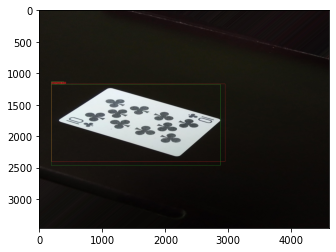

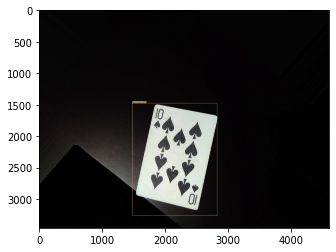

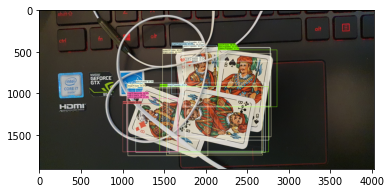

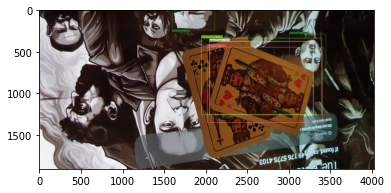

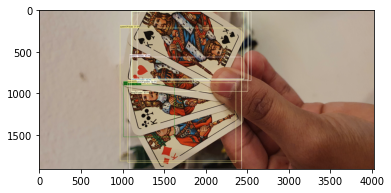

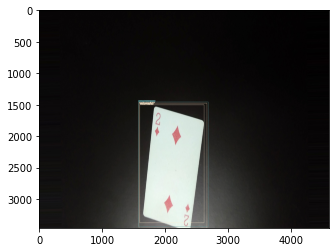

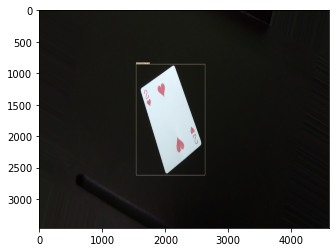

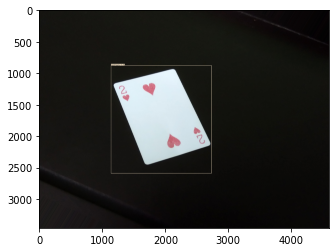

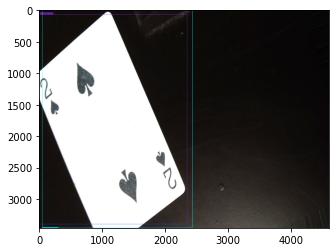

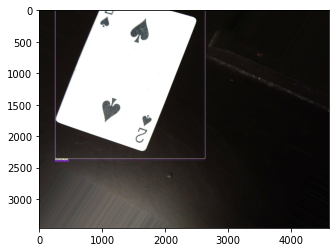

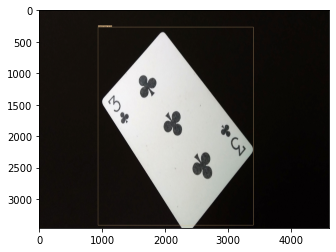

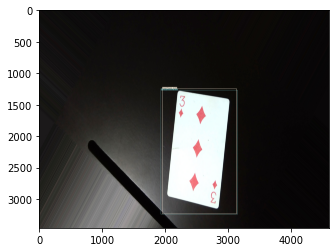

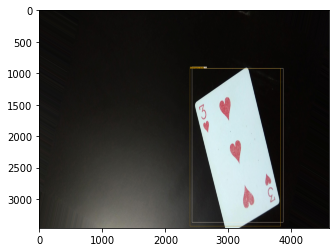

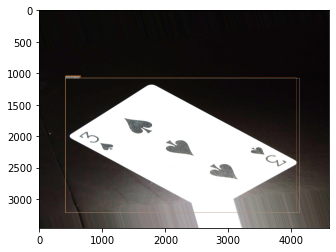

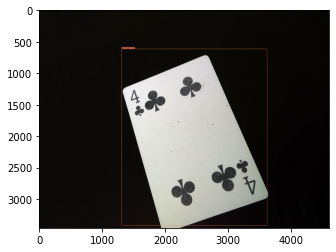

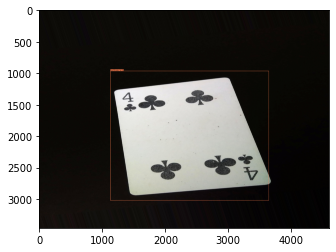

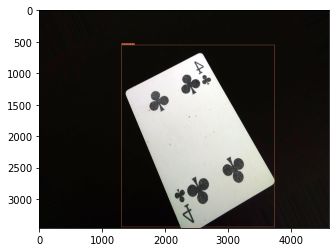

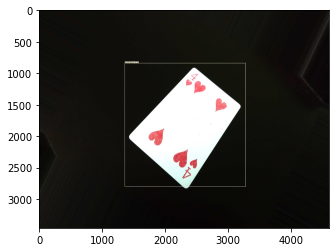

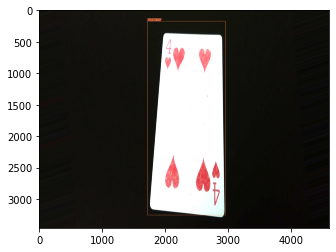

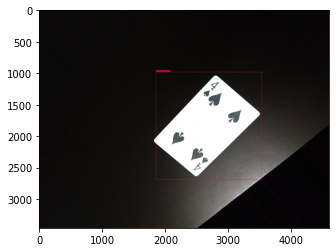

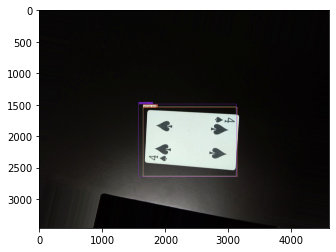

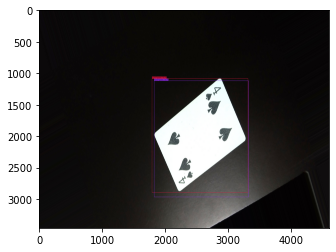

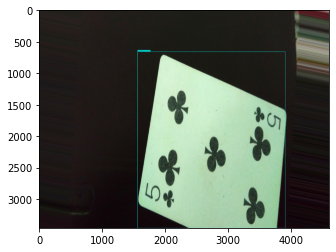

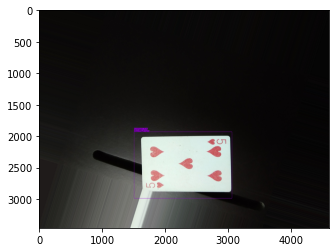

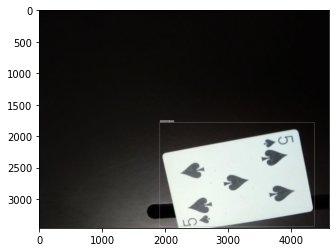

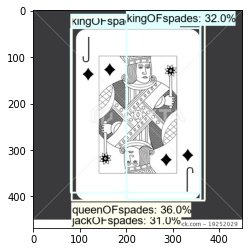

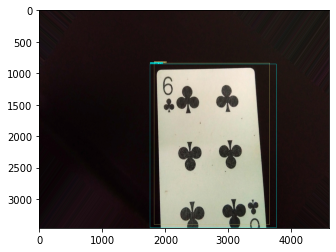

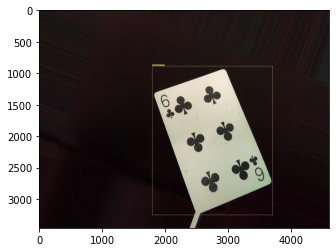

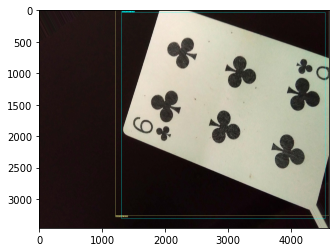

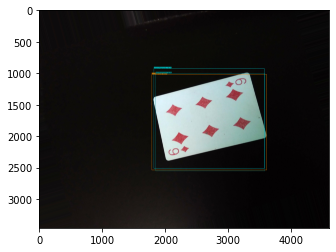

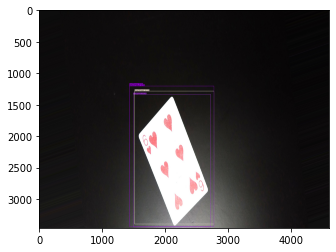

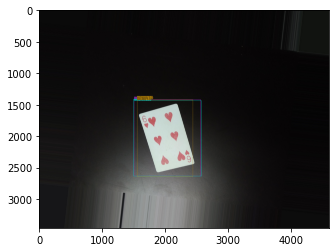

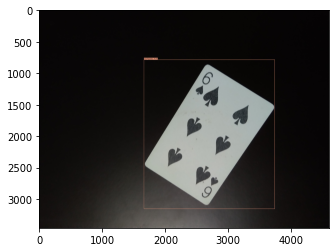

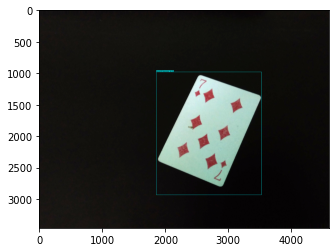

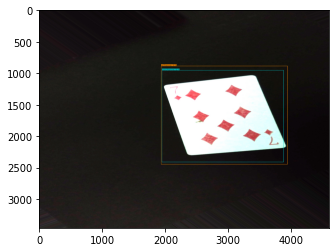

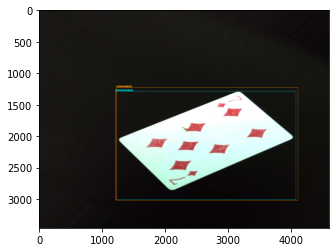

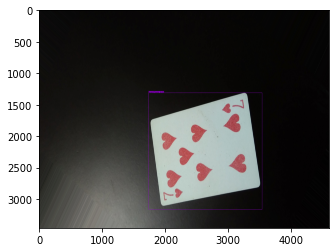

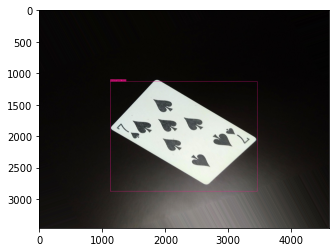

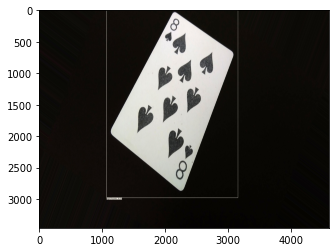

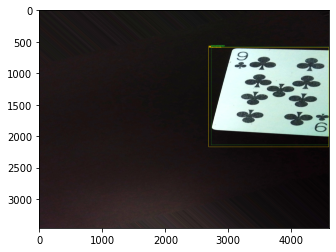

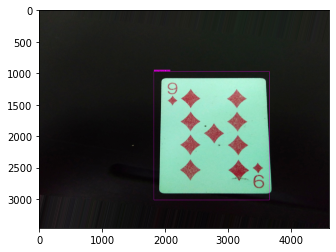

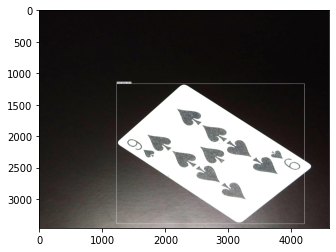

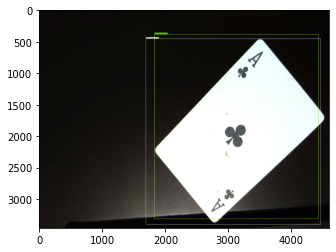

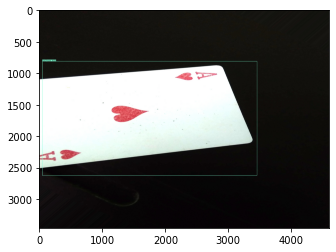

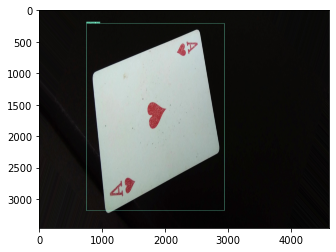

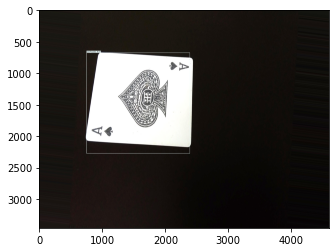

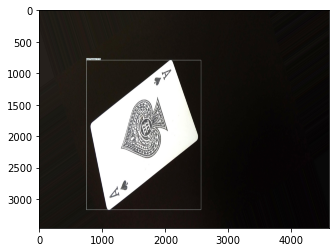

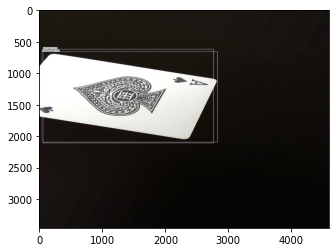

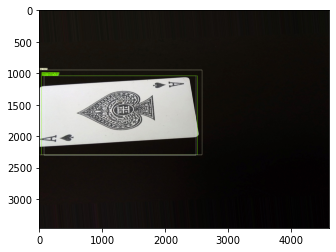

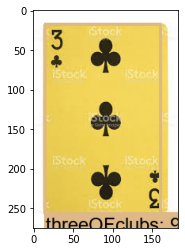

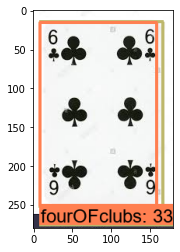

In [2]:
"""
Developer: vkyprmr
Filename: objdet_imgs.py
Created on: 2020-11-14, Sat, 23:57:7
"""
"""
Modified by: vkyprmr
Last modified on: 2020-11-15, Sun, 0:2:30
"""

import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import time
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

device = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(device[0], True)
except Exception as e:
    print(f'Error: {e}')

warnings.filterwarnings('ignore')  # Suppress Matplotlib warnings

PATH_TO_MODEL_DIR = 'Z:/personal/projects/git/projectIncKnowHow/tf_dev/computerVision/objectDetection/playing_cards' \
                    '/exported-models/ssd'    # _mobilenet_v2_320x320_coco17_tpu-8

PATH_TO_LABELS = 'Z:/personal/projects/git/projectIncKnowHow/tf_dev/computerVision/objectDetection/playing_cards' \
                 '/annotations/label_map.pbtxt'

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

IMG_PATH = 'Z:/personal/projects/git/projectIncKnowHow/Data/playing_cards/archive/validation/'
IMAGE_PATHS = glob.glob(IMG_PATH + '*.*')

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)


def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:
    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.30,
        agnostic_mode=False)

    # print(image_np_with_detections.shape)

    plt.figure(figsize=(20,20))
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()